In [1]:
from __future__ import division
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
sns.set_style('white')
sns.set_context('paper')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
from pgf import PGF

In [4]:
# Load the beam model
import scipy.io as sio
dat = sio.loadmat('beam.mat')
A = dat['A'].toarray()
b = dat['B'][:,0]
c = dat['C'][0,:]

In [5]:
# Generate the impulse response data
# Here we explicitly compute the eigendecomposition of A to 
# solve the linear-time invariant system. This is done to prevent
# error from entering in from time stepping methods

n = 2**13
ew, ev = np.linalg.eig(A)
evi = np.linalg.inv(ev)

dt = 1e-1
y = np.zeros((n,), dtype = np.complex)
cev = np.dot(c, ev)
evib = np.dot(evi, b)
for i, t in enumerate(np.arange(n)*dt):
    y[i]= np.dot(np.dot(cev, np.diag(np.exp(t*ew))), evib )

y = y.real

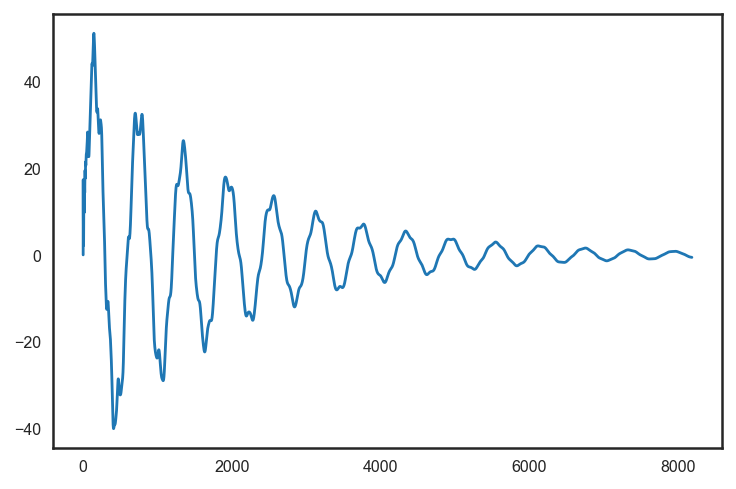

In [6]:
fig, ax = plt.subplots()
ax.plot(y)

(4097, 4096)


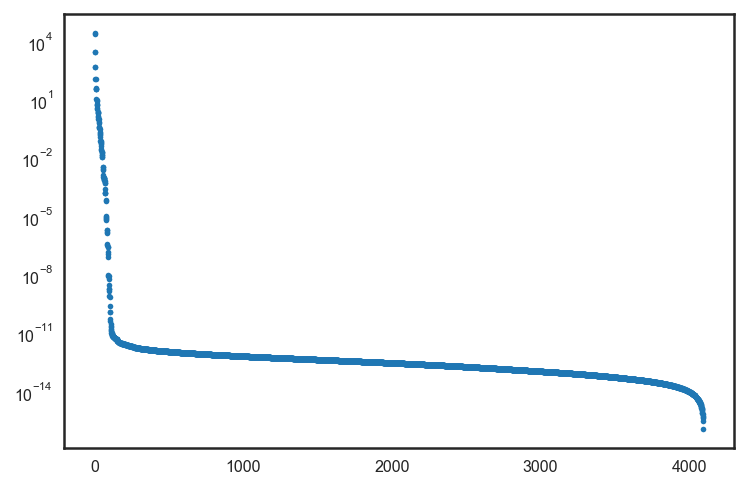

In [7]:
# Compute all the singular values of this matrix
from scipy.linalg import hankel
n = 2**13
H = hankel(y[:n//2+1],y[n//2:])
print H.shape
s_all = np.linalg.svd(H, compute_uv = False)
fig, ax = plt.subplots()
ax.plot(s_all,'.')
ax.set_yscale('log');

In [8]:
# Most are small
np.sum(s_all>1e-10)

105

In [10]:
s_all[345:350]

array([1.34510547e-12, 1.34199593e-12, 1.33825523e-12, 1.33568581e-12,
       1.33405755e-12])

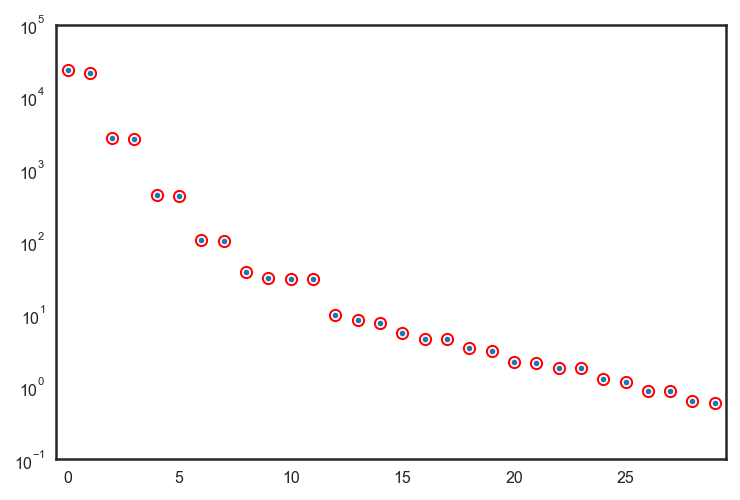

In [11]:
# Check ARPACK's solution to the eigenvalue problem
from scipy.sparse.linalg import svds
from hankel import Hankel
n = len(y)
H = Hankel(y[:n//2+1],y[n//2:])
s = svds(H, k = 30, which = 'LM', return_singular_vectors = False, ncv = 200 )
fig, ax = plt.subplots()
ax.plot(-np.sort(-s),'.')
ax.plot(s_all, 'ro', markerfacecolor = 'none', markeredgewidth = 1)
ax.set_xlim(-0.5, 29.5)
ax.set_yscale('log')
ax.set_ylim(1e-1, 1e5);

# Generating Plots

In [12]:
from joblib import Memory
memory = Memory(cachedir = './.dat', verbose = 0)

In [13]:
@memory.cache
def beam_noise(seed = 0, m = None, epsilon = 1):
    np.random.seed(seed)
    n = len(y)
    g = np.random.randn(n)
    yt = y + epsilon * g
    #yt = np.array(yt, dtype = np.complex)
    if m is None:
        m = (n//2)
    # Construct the Hankel matrix 
    Ht = Hankel(yt[:512+1],yt[512:])
    s = svds(Ht, k = 50, which = 'LM', return_singular_vectors = False)
    s = -np.sort(-s)
    return s

In [19]:
from hankel_bound import hankel_gaussian_real
from fig_random_hankel import random_hankel_norm
sv_emperical = np.percentile([random_hankel_norm(seed = i, n = n//2+1, m = n//2, complex_ = False) for i in range(1000)], 95)

00010: computing SVD of 4097 x 4096 Hankel matrix
00011: computing SVD of 4097 x 4096 Hankel matrix
00012: computing SVD of 4097 x 4096 Hankel matrix
00013: computing SVD of 4097 x 4096 Hankel matrix
00014: computing SVD of 4097 x 4096 Hankel matrix
00015: computing SVD of 4097 x 4096 Hankel matrix
00016: computing SVD of 4097 x 4096 Hankel matrix
00017: computing SVD of 4097 x 4096 Hankel matrix
00018: computing SVD of 4097 x 4096 Hankel matrix
00019: computing SVD of 4097 x 4096 Hankel matrix
00020: computing SVD of 4097 x 4096 Hankel matrix
00021: computing SVD of 4097 x 4096 Hankel matrix
00022: computing SVD of 4097 x 4096 Hankel matrix
00023: computing SVD of 4097 x 4096 Hankel matrix
00024: computing SVD of 4097 x 4096 Hankel matrix
00025: computing SVD of 4097 x 4096 Hankel matrix
00026: computing SVD of 4097 x 4096 Hankel matrix
00027: computing SVD of 4097 x 4096 Hankel matrix
00028: computing SVD of 4097 x 4096 Hankel matrix
00029: computing SVD of 4097 x 4096 Hankel matrix


00175: computing SVD of 4097 x 4096 Hankel matrix
00176: computing SVD of 4097 x 4096 Hankel matrix
00177: computing SVD of 4097 x 4096 Hankel matrix
00178: computing SVD of 4097 x 4096 Hankel matrix
00179: computing SVD of 4097 x 4096 Hankel matrix
00180: computing SVD of 4097 x 4096 Hankel matrix
00181: computing SVD of 4097 x 4096 Hankel matrix
00182: computing SVD of 4097 x 4096 Hankel matrix
00183: computing SVD of 4097 x 4096 Hankel matrix
00184: computing SVD of 4097 x 4096 Hankel matrix
00185: computing SVD of 4097 x 4096 Hankel matrix
00186: computing SVD of 4097 x 4096 Hankel matrix
00187: computing SVD of 4097 x 4096 Hankel matrix
00188: computing SVD of 4097 x 4096 Hankel matrix
00189: computing SVD of 4097 x 4096 Hankel matrix
00190: computing SVD of 4097 x 4096 Hankel matrix
00191: computing SVD of 4097 x 4096 Hankel matrix
00192: computing SVD of 4097 x 4096 Hankel matrix
00193: computing SVD of 4097 x 4096 Hankel matrix
00194: computing SVD of 4097 x 4096 Hankel matrix


00340: computing SVD of 4097 x 4096 Hankel matrix
00341: computing SVD of 4097 x 4096 Hankel matrix
00342: computing SVD of 4097 x 4096 Hankel matrix
00343: computing SVD of 4097 x 4096 Hankel matrix
00344: computing SVD of 4097 x 4096 Hankel matrix
00345: computing SVD of 4097 x 4096 Hankel matrix
00346: computing SVD of 4097 x 4096 Hankel matrix
00347: computing SVD of 4097 x 4096 Hankel matrix
00348: computing SVD of 4097 x 4096 Hankel matrix
00349: computing SVD of 4097 x 4096 Hankel matrix
00350: computing SVD of 4097 x 4096 Hankel matrix
00351: computing SVD of 4097 x 4096 Hankel matrix
00352: computing SVD of 4097 x 4096 Hankel matrix
00353: computing SVD of 4097 x 4096 Hankel matrix
00354: computing SVD of 4097 x 4096 Hankel matrix
00355: computing SVD of 4097 x 4096 Hankel matrix
00356: computing SVD of 4097 x 4096 Hankel matrix
00357: computing SVD of 4097 x 4096 Hankel matrix
00358: computing SVD of 4097 x 4096 Hankel matrix
00359: computing SVD of 4097 x 4096 Hankel matrix


00506: computing SVD of 4097 x 4096 Hankel matrix
00507: computing SVD of 4097 x 4096 Hankel matrix
00508: computing SVD of 4097 x 4096 Hankel matrix
00509: computing SVD of 4097 x 4096 Hankel matrix
00510: computing SVD of 4097 x 4096 Hankel matrix
00511: computing SVD of 4097 x 4096 Hankel matrix
00512: computing SVD of 4097 x 4096 Hankel matrix
00513: computing SVD of 4097 x 4096 Hankel matrix
00514: computing SVD of 4097 x 4096 Hankel matrix
00515: computing SVD of 4097 x 4096 Hankel matrix
00516: computing SVD of 4097 x 4096 Hankel matrix
00517: computing SVD of 4097 x 4096 Hankel matrix
00518: computing SVD of 4097 x 4096 Hankel matrix
00519: computing SVD of 4097 x 4096 Hankel matrix
00520: computing SVD of 4097 x 4096 Hankel matrix
00521: computing SVD of 4097 x 4096 Hankel matrix
00522: computing SVD of 4097 x 4096 Hankel matrix
00523: computing SVD of 4097 x 4096 Hankel matrix
00524: computing SVD of 4097 x 4096 Hankel matrix
00525: computing SVD of 4097 x 4096 Hankel matrix


00671: computing SVD of 4097 x 4096 Hankel matrix
00672: computing SVD of 4097 x 4096 Hankel matrix
00673: computing SVD of 4097 x 4096 Hankel matrix
00674: computing SVD of 4097 x 4096 Hankel matrix
00675: computing SVD of 4097 x 4096 Hankel matrix
00676: computing SVD of 4097 x 4096 Hankel matrix
00677: computing SVD of 4097 x 4096 Hankel matrix
00678: computing SVD of 4097 x 4096 Hankel matrix
00679: computing SVD of 4097 x 4096 Hankel matrix
00680: computing SVD of 4097 x 4096 Hankel matrix
00681: computing SVD of 4097 x 4096 Hankel matrix
00682: computing SVD of 4097 x 4096 Hankel matrix
00683: computing SVD of 4097 x 4096 Hankel matrix
00684: computing SVD of 4097 x 4096 Hankel matrix
00685: computing SVD of 4097 x 4096 Hankel matrix
00686: computing SVD of 4097 x 4096 Hankel matrix
00687: computing SVD of 4097 x 4096 Hankel matrix
00688: computing SVD of 4097 x 4096 Hankel matrix
00689: computing SVD of 4097 x 4096 Hankel matrix
00690: computing SVD of 4097 x 4096 Hankel matrix


00837: computing SVD of 4097 x 4096 Hankel matrix
00838: computing SVD of 4097 x 4096 Hankel matrix
00839: computing SVD of 4097 x 4096 Hankel matrix
00840: computing SVD of 4097 x 4096 Hankel matrix
00841: computing SVD of 4097 x 4096 Hankel matrix
00842: computing SVD of 4097 x 4096 Hankel matrix
00843: computing SVD of 4097 x 4096 Hankel matrix
00844: computing SVD of 4097 x 4096 Hankel matrix
00845: computing SVD of 4097 x 4096 Hankel matrix
00846: computing SVD of 4097 x 4096 Hankel matrix
00847: computing SVD of 4097 x 4096 Hankel matrix
00848: computing SVD of 4097 x 4096 Hankel matrix
00849: computing SVD of 4097 x 4096 Hankel matrix
00850: computing SVD of 4097 x 4096 Hankel matrix
00851: computing SVD of 4097 x 4096 Hankel matrix
00852: computing SVD of 4097 x 4096 Hankel matrix
00853: computing SVD of 4097 x 4096 Hankel matrix
00854: computing SVD of 4097 x 4096 Hankel matrix
00855: computing SVD of 4097 x 4096 Hankel matrix
00856: computing SVD of 4097 x 4096 Hankel matrix


In [20]:
print np.log10(sv_emperical*1e-1)

1.2724142798442815


In [21]:
bnd = hankel_gaussian_real(n)*1e-1
print np.log10(bnd)

1.6340971127515376


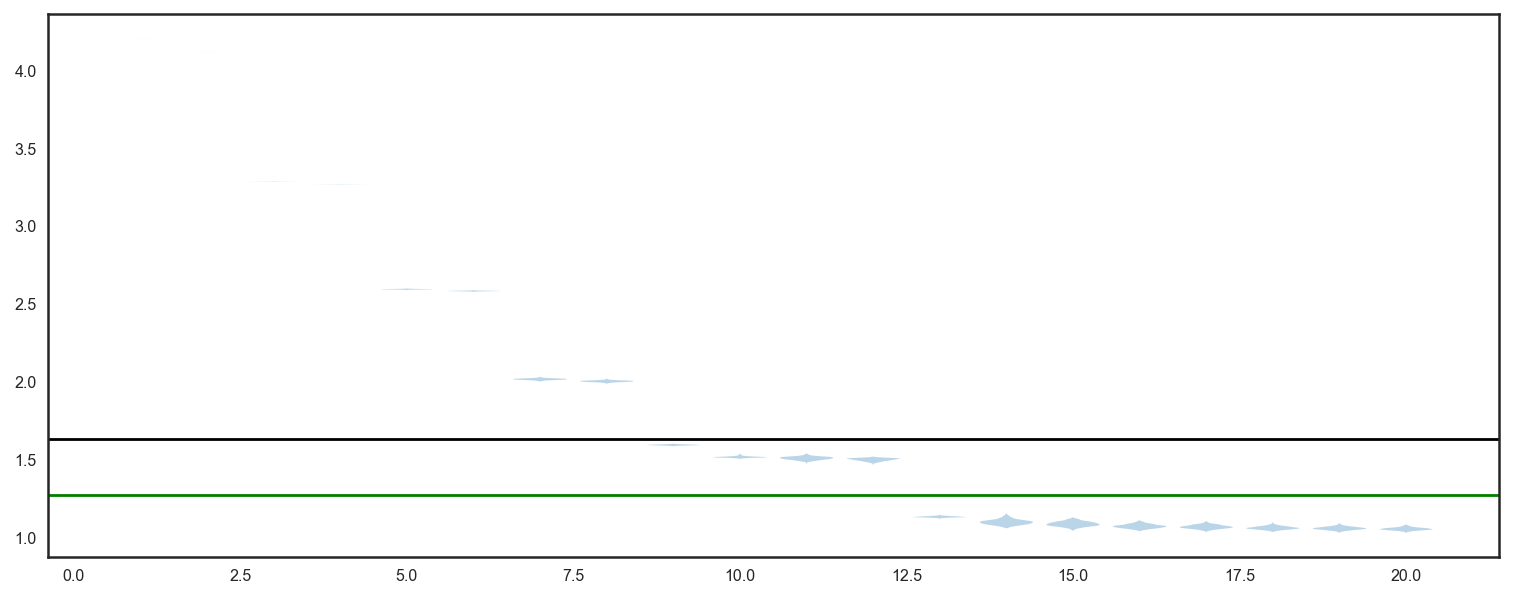

In [22]:
#epsilon = 5e-1
epsilon = 1e-1
SV = np.array([beam_noise(seed = i, epsilon = epsilon, m = None) for i in range(1000)])
fig, ax = plt.subplots(figsize = (13, 5))
violin = ax.violinplot(np.log10(SV[:,0:20]), showextrema = False, widths = 0.8);
#ax.set_yscale('log')
bnd = hankel_gaussian_real(n)*epsilon
ax.axhline(y = np.log10(bnd), color = 'k')
ax.axhline(y = np.log10(sv_emperical*epsilon), color = 'g')

In [23]:

for i, path in enumerate(violin['bodies']):
    verts =  path._paths[0].vertices
    output = PGF()
    output.add('x', verts[:,0])
    output.add('y', verts[:,1])
    output.write('fig_beam_density_%02d.dat' % i)
    np.log10(SV[:,0:20])
    extrema = PGF()
    extrema.add('x', [i+1,i+1])
    extrema.add('y', [np.log10(np.min(SV[:,i])),np.log10(np.max(SV[:,i])) ])
    extrema.write('fig_beam_extrema_%02d.dat' % i)

In [ ]:
from hsvd import hsvd, mkV
@memory.cache
def beam_aic(seed = 0, m = None, epsilon = 1):
    n = len(y)
    g = np.random.randn(n)
    yt = y + epsilon * g
    
    # Compute the optimal fit for each size problem
    aic = np.zeros(20)
    for rank in range(1,20):
        omega, a = hsvd(yt, rank)
        y_fit = np.dot(mkV(omega, n), a)
        log_likelihood = (-n/2)*np.log(2*np.pi*epsilon**2)  - np.linalg.norm(yt - y_fit)**2/(2.*epsilon**2)
        k = 4*rank
        aic[rank] = 2*k - 2*log_likelihood # + 2*k*(k+1)/(n-k-1)
    return aic
AIC = np.array([beam_aic(seed = i, epsilon = epsilon, m = None) for i in range(1000)])

In [29]:
from pgf import PGF
dat = PGF()
rank = np.arange(1,21)
dat.add('rank', rank)
est_rank = np.array([np.argmin(AIC_[1:])+1 for AIC_ in AIC])
est_rank_count = np.array([np.sum(est_rank==r) for r in rank])/len(est_rank)
dat.add('AIC', est_rank_count)
bnd_rank = np.array([np.sum(SV_ > bnd) for SV_ in SV])
bnd_rank_count = np.array([np.sum(bnd_rank==r) for r in rank])/len(bnd_rank)
dat.add('bound', bnd_rank_count)
emp_rank = np.array([np.sum(SV_ > sv_emperical*epsilon) for SV_ in SV])
emp_rank_count = np.array([np.sum(emp_rank == r) for r in rank])/len(emp_rank)
dat.add('empirical', emp_rank_count)
dat.write('fig_beam_count.dat')

(array([   0.,    0.,    0.,    0.,    0., 1000.,    0.,    0.,    0.,
           0.]),
 array([11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1, 12.2, 12.3, 12.4, 12.5]),
 <a list of 10 Patch objects>)

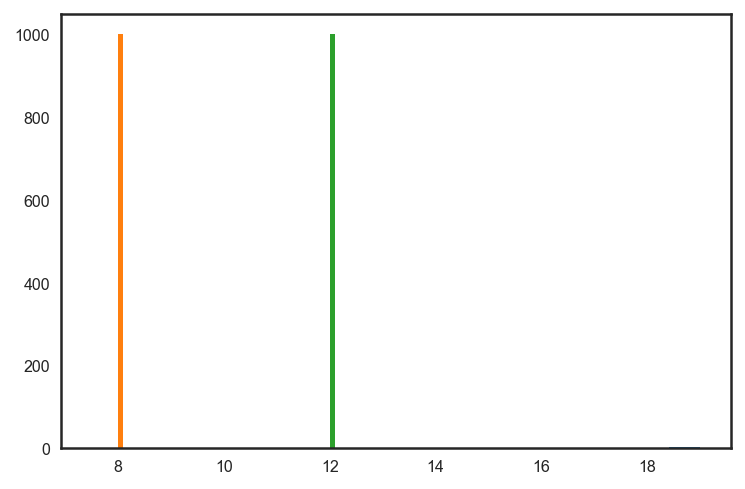

In [30]:

fig, ax = plt.subplots()
ax.hist(est_rank)
ax.hist(bnd_rank)
ax.hist(emp_rank)